In [171]:
import os
import random
import numpy as np
import seaborn as sns
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import pywt
import pywt.data
from random import randrange
np.random.seed(10)
import warnings
warnings.filterwarnings("ignore")

## Lectura de imagenes

In [172]:
width = 48
height = 48

In [173]:
path = r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Machine Learning\Proyecto1\images'

In [174]:
#### Funcion para leer imagenes dentro de una carpeta
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)[:,:]    
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images

anger


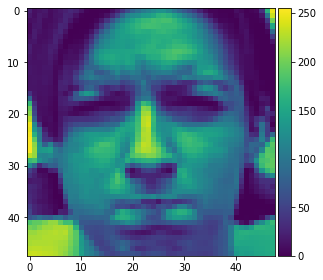

contempt


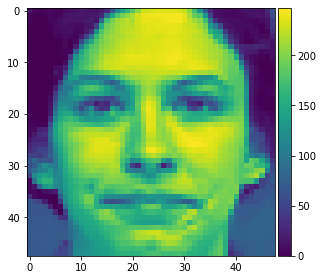

disgust


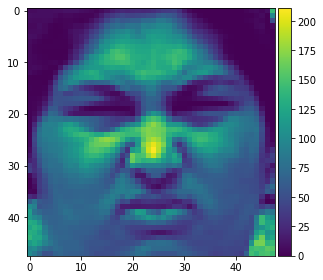

fear


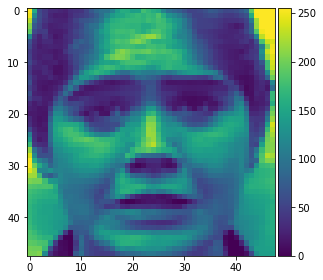

happy


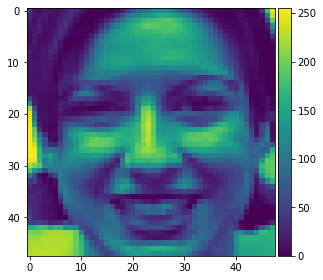

sadness


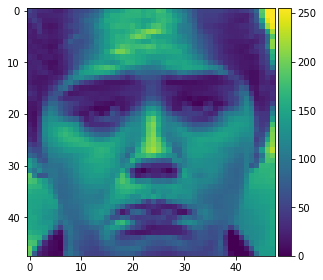

surprise


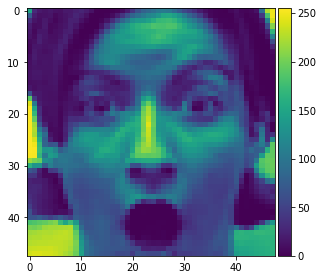

In [175]:
### angry Train and validation
print('anger')
anger = imageReading(path + '\\' + 'anger')

print('contempt')
contempt = imageReading(path + '\\' + 'contempt')

print('disgust')
disgust = imageReading(path + '\\' + 'disgust')

print('fear')
fear = imageReading(path + '\\' + 'fear')

print('happy')
happy = imageReading(path + '\\' + 'happy')

print('sadness')
sadness = imageReading(path + '\\' + 'sadness')

print('surprise')
surprise = imageReading(path + '\\' + 'surprise')

## Preparacion de data

In [176]:
def Haar(imagen, cortes):
    for i in range(cortes):
        LL, (LH, HL, HH) = pywt.dwt2(imagen, 'haar')
        imagen = LL #Aproximacion
    return imagen

def vectorizar(matrix):
    return matrix.flatten()

def preprocesar(imagenes, cortes):
    puntos_x = list();
    for img in imagenes:
        puntos_x.append(vectorizar(Haar(img,cortes)))
    return np.array(puntos_x)

In [177]:
dataset = np.concatenate((anger, contempt, disgust, 
                         fear, happy, sadness, surprise), axis=0)
# dividimos entre 255.0 la intensidad de los pixeles para normalizar la data, esto se puede realizar
# antes o despues de aplicar haar wavelet
dataset = preprocesar(dataset/255.0,2)

# 0-Angry, 1-Disgust, 2-Fear, 3-Happy, 4-Neutral, 5-Sad, 6-Surprise
labels = np.concatenate((np.zeros(anger.shape[0]), np.zeros(contempt.shape[0])+1,
                        np.zeros(disgust.shape[0])+2, np.zeros(fear.shape[0])+3,
                        np.zeros(happy.shape[0])+4,np.zeros(sadness.shape[0])+5,
                        np.zeros(surprise.shape[0])+6))

sentimientos = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

In [178]:
# division de datos
X_train, X_test, Y_train, Y_test = train_test_split(dataset, labels, test_size=0.35, stratify = labels)

### Pruebas iniciales
#### Estas consisten en entrenar un modelo de SVM, Decision Tree y KNN con los datos divididos

### SVM

[51 27 59 33 37 43 45]


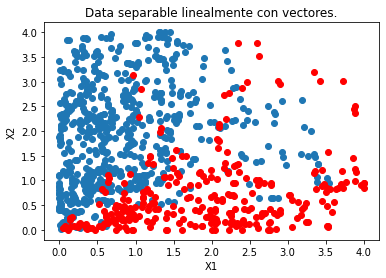

In [203]:
# Initialize SVM classifier
#clf = Pipeline([('std_scaler', StandardScaler()), ('scv', SVC(kernel='linear'))])
clf = SVC(kernel='linear',C=1)
# Fit data
clf = clf.fit(X_train, Y_train)
# Get support vector indices
support_vector_indices = clf.support_
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,8])
plt.scatter(support_vectors[:,8], support_vectors[:,1], color='red')
plt.title('Data separable linealmente con vectores.')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [206]:
svm_model = LinearSVC(penalty="l2", dual=False, tol=1e-2, max_iter = 1000, loss='squared_hinge', C=1, random_state=5)
#svm_model =  SVC(kernel='linear',C=1)
svm_model.fit(X_train, Y_train)

LinearSVC(C=1, dual=False, random_state=5, tol=0.01)

In [207]:
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM accuracy", svm_acc)

SVM accuracy 0.9825581395348837


### Decision Tree

Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.41 < 1.0 pt not allowed by FreeType. Setting fontsize

[Text(157.87395833333335, 209.6742857142857, 'X[114] <= 1.838\ngini = 0.823\nsamples = 637\nvalue = [88, 35, 115, 49, 134, 54, 162]'),
 Text(90.35208333333334, 194.14285714285714, 'X[102] <= 2.293\ngini = 0.722\nsamples = 278\nvalue = [36, 18, 38, 16, 17, 21, 132]'),
 Text(46.37083333333334, 178.61142857142858, 'X[114] <= 0.717\ngini = 0.839\nsamples = 167\nvalue = [33, 18, 36, 14, 17, 18, 31]'),
 Text(16.533333333333335, 163.07999999999998, 'X[52] <= 0.406\ngini = 0.396\nsamples = 30\nvalue = [3, 0, 1, 1, 0, 2, 23]'),
 Text(8.266666666666667, 147.54857142857142, 'X[99] <= 1.257\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 0, 0, 0, 2, 0]'),
 Text(4.133333333333334, 132.01714285714286, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0]'),
 Text(12.400000000000002, 132.01714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(24.800000000000004, 147.54857142857142, 'X[91] <= 1.407\ngini = 0.15\nsamples = 25\nvalue = [0, 0, 1, 1, 0, 0, 23]'),
 Text(20.666666666666

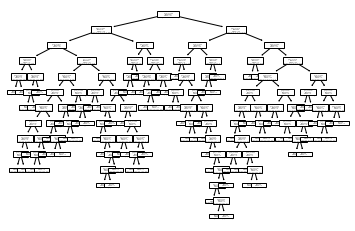

In [182]:
tree_model = DecisionTreeClassifier(max_depth=None, max_features=None)
tree_model.fit(X_train, Y_train)
plot_tree(tree_model)

In [183]:
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(Y_test, tree_pred)
print("DT accuracy", tree_acc)

DT accuracy 0.8430232558139535


### KNN

Score de modelo preliminar:
0.7209302325581395


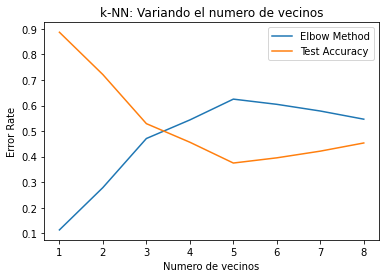

In [184]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, Y_train)
print("Score de modelo preliminar:")
print(knn_model.score(X_test,Y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
error_rate = np.empty(len(no_neighbors))
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,Y_train)
    
    # Error rate when classifying an unseen test point
    pred_i = knn.predict(X_test)
    error_rate[i] = np.mean(pred_i != Y_test)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, Y_test)
    
# Visualization of k values vs accuracy

plt.title('k-NN: Variando el numero de vecinos')
plt.plot(no_neighbors, error_rate, label = 'Elbow Method')
plt.plot(no_neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('Error Rate')
plt.show()

In [185]:
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
print("KNN accuracy", knn_acc)

KNN accuracy 0.7209302325581395


#### Experimentacion con cross validation

In [186]:
numberOfFolds = 10

In [187]:
dataset2 = np.concatenate((anger, contempt, disgust, 
                         fear, happy, sadness, surprise), axis=0)
# dividimos entre 255.0 la intensidad de los pixeles para normalizar la data, esto se puede realizar
# antes o despues de aplicar haar wavelet
dataset2 = preprocesar(dataset2/255.0,2)
data2 = np.concatenate((dataset2, labels.reshape(-1,1)), axis=1)
np.random.seed(10)
np.random.shuffle(data2)

In [188]:
def entrenarModeloKfold (modelo, data2, k):
    tamanoParticion = round((data2.shape[0]/float(k)))
    error = []
    acc = []
    palette = sns.color_palette("rocket", as_cmap=True)
    for i in range(k):
        X= np.copy(data2)
        test= X[i*tamanoParticion:((i+1)*tamanoParticion),:]
        indices = []
        for j in range(X.shape[0]):
            for k in range(test.shape[0]):
                comparacion = (X[j]==test[k])
                igualdad = comparacion.all()
                if igualdad:
                    indices.append(i)
        #train = np.delete(X, indices, axis=0)
        train = np.array([x for x in X.tolist() if x not in test.tolist()])        
        X_train = train[:,0:train.shape[1]-1]
        Y_train = train[:,train.shape[1]-1]
        X_test = test[:,0:test.shape[1]-1]
        Y_test = test[:,test.shape[1]-1]
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        accuracy = accuracy_score(Y_test, pred)
        acc.append(accuracy)
        error.append(1-accuracy)        
    fig = plt.figure()
    sns.distplot(error, hist=False, color=sns.color_palette()[randrange(10)])
    plt.show()
    print("El valor del error promedio durante el testing es: ", np.array(error).mean())
    print("La desviacion estandar del error es: ", np.array(error).std())
    pred = modelo.predict(X_test)
    print("La matriz de confusion es:") # \n", confusion_matrix(Y_test, pred))
    cm = confusion_matrix(Y_test, pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=sentimientos)
    disp.plot()

##### SVM

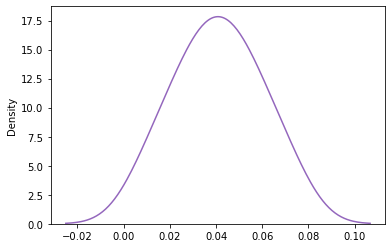

El valor del error promedio durante el testing es:  0.04081632653061225
La desviacion estandar del error es:  0.017673987832335456
La matriz de confusion es:


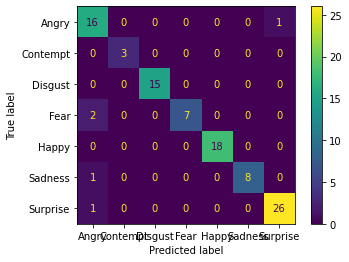

In [189]:
modelo_svm = LinearSVC(penalty="l2", dual=False, tol=1e-2, max_iter = 1000, loss='squared_hinge', C=0.02, random_state=5)
entrenarModeloKfold(modelo_svm, data2, numberOfFolds)

#### Arboles de decision

---------------------------------------Arboles de decision---------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------


----------------------------------------Resultados cuando se usa: gini---------------------------------



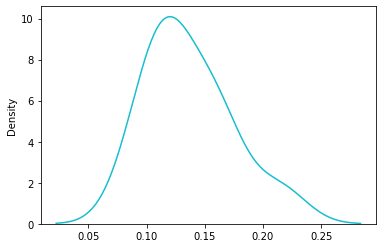

El valor del error promedio durante el testing es:  0.13673469387755102
La desviacion estandar del error es:  0.03481371859026934
La matriz de confusion es:
----------------------------------------Resultados cuando se usa: entropy---------------------------------



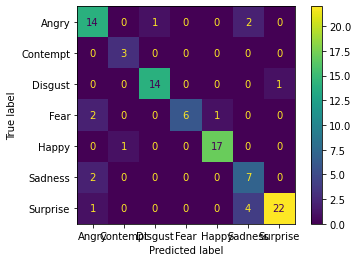

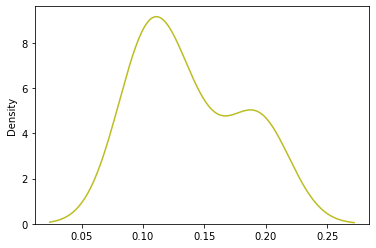

El valor del error promedio durante el testing es:  0.1377551020408163
La desviacion estandar del error es:  0.039056447365315584
La matriz de confusion es:


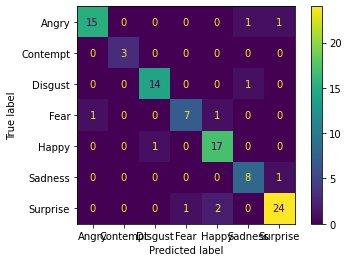

In [190]:
print("---------------------------------------Arboles de decision---------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("\n")
np.random.seed(5)
tree_criterion = ["gini", "entropy"]
for criterio in tree_criterion:
    print("----------------------------------------Resultados cuando se usa: " + criterio + "---------------------------------" "\n")
    modelo_tree = DecisionTreeClassifier(criterion=criterio,max_depth=None, max_features=None, random_state=5)
    entrenarModeloKfold(modelo_tree, data2, numberOfFolds)    

In [191]:
def entrenarModeloKfold (modelo, data2, k, neighbor, distancia):
    tamanoParticion = round((data2.shape[0]/float(k)))
    error = []
    acc = []
    for i in range(k):
        X= np.copy(data2)
        test= X[i*tamanoParticion:((i+1)*tamanoParticion),:]
        indices = []
        for j in range(X.shape[0]):
            for k in range(test.shape[0]):
                comparacion = (X[j]==test[k])
                igualdad = comparacion.all()
                if igualdad:
                    indices.append(i)
        #train = np.delete(X, indices, axis=0)
        train = np.array([x for x in X.tolist() if x not in test.tolist()])        
        X_train = train[:,0:train.shape[1]-1]
        Y_train = train[:,train.shape[1]-1]
        X_test = test[:,0:test.shape[1]-1]
        Y_test = test[:,test.shape[1]-1]
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        accuracy = accuracy_score(Y_test, pred)
        acc.append(accuracy)
        error.append(1-accuracy)
    fig = plt.figure()
    fig.legend(str(distancia) + str(neighbor))
    sns.distplot(error, hist=False, color=sns.color_palette()[randrange(10)])
    plt.show()
    print("El valor del error promedio durante el testing es: ", np.array(error).mean())
    print("La desviacion estandar del error es: ", np.array(error).std())
    pred = modelo.predict(X_test)
    print("La matriz de confusion es:") # \n", confusion_matrix(Y_test, pred))
    cm = confusion_matrix(Y_test, pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=sentimientos)
    disp.plot()

#### KNN

-----------------------------------------------KNN-----------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------


-------------------------Resultados cuando se usa distancia Manhattan----------------------------------
-------------------------------------------------------------------------------------------------------
Resultados cuando se usa k= 2



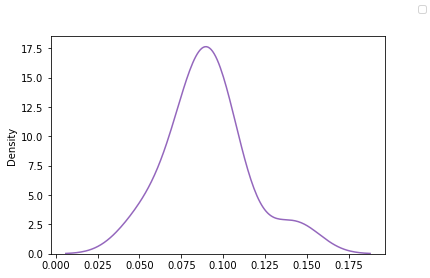

El valor del error promedio durante el testing es:  0.09081632653061224
La desviacion estandar del error es:  0.022564637130097962
La matriz de confusion es:


Resultados cuando se usa k= 3



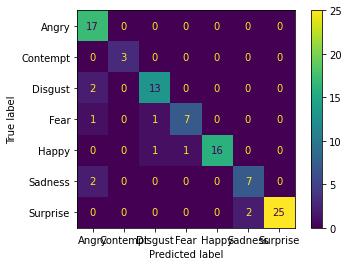

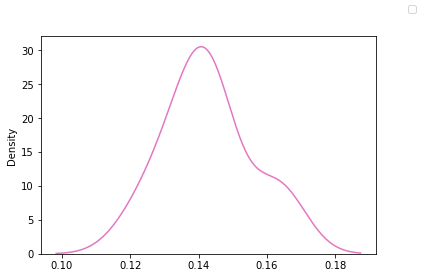

El valor del error promedio durante el testing es:  0.14285714285714288
La desviacion estandar del error es:  0.012073632210407356
La matriz de confusion es:


-------------------------Resultados cuando se usa distancia Euclideana---------------------------------
-------------------------------------------------------------------------------------------------------
Resultados cuando se usa k= 2



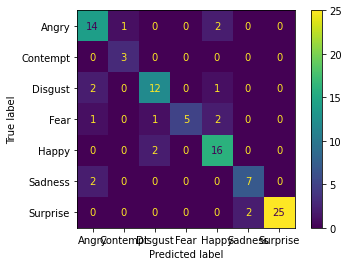

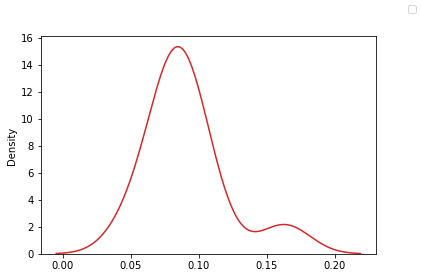

El valor del error promedio durante el testing es:  0.09081632653061222
La desviacion estandar del error es:  0.02792639221102859
La matriz de confusion es:


Resultados cuando se usa k= 3



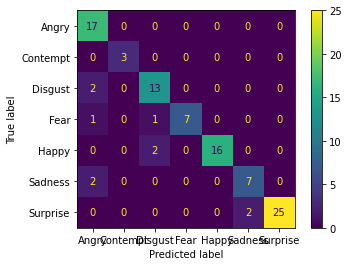

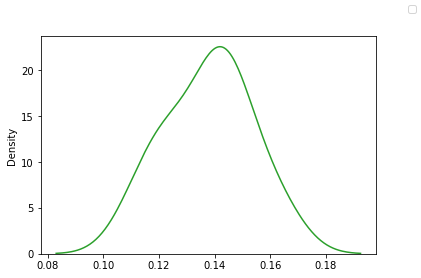

El valor del error promedio durante el testing es:  0.13775510204081634
La desviacion estandar del error es:  0.014610021493139122
La matriz de confusion es:




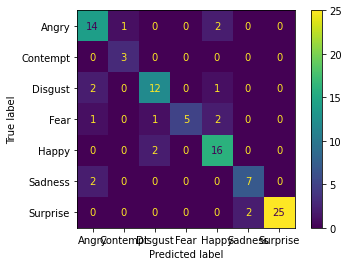

In [192]:
np.random.seed(5)
n_neighbors = [i for i in range(2,4)]
print("-----------------------------------------------KNN-----------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("\n")

print("-------------------------Resultados cuando se usa distancia Manhattan----------------------------------")
print("-------------------------------------------------------------------------------------------------------")
for neighbors in n_neighbors:
    print("Resultados cuando se usa k= " + str(neighbors) + "\n")
    modelo_knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm= 'kd_tree',p=1)
    entrenarModeloKfold(modelo_knn, data2, numberOfFolds, neighbors, "Manhattan")
    print("\n")    
print("-------------------------Resultados cuando se usa distancia Euclideana---------------------------------")
print("-------------------------------------------------------------------------------------------------------")
for neighbors in n_neighbors:
    print("Resultados cuando se usa k= " + str(neighbors) + "\n")
    modelo_knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm= 'kd_tree',p=2)
    entrenarModeloKfold(modelo_knn, data2, numberOfFolds, neighbors, "Euclideana")    
    print("\n") 

### Experimentacion con bootstrap

### Preparacion de data

In [193]:
dataset2 = np.concatenate((anger, contempt, disgust, 
                         fear, happy, sadness, surprise), axis=0)
# dividimos entre 255.0 la intensidad de los pixeles para normalizar la data, esto se puede realizar
# antes o despues de aplicar haar wavelet
dataset2 = preprocesar(dataset2/255.0,2)
data2 = np.concatenate((dataset2, labels.reshape(-1,1)), axis=1)
np.random.seed(10)
np.random.shuffle(data2)

In [194]:
# Parametros
n = 687
repeticiones = 10

In [195]:
def bootstrap(muestras, data2):
    trainingBootstrap = resample(data2, replace=True, n_samples = muestras)
    tempBootstrap = data2
    indices = []
    for i in range(data2.shape[0]):
        for j in range(trainingBootstrap.shape[0]):
            comparacion = (data2[i]==trainingBootstrap[j])
            igualdad = comparacion.all()
            if igualdad:
                indices.append(i)
    testBootstrap2 = np.delete(tempBootstrap, indices, axis=0)            
#testBootstrap2 = np.array([x for x in data2.tolist() if x not in trainingBootstrap.tolist()])

    X_train = trainingBootstrap[:,0:trainingBootstrap.shape[1]-1]
    Y_train = trainingBootstrap[:,trainingBootstrap.shape[1]-1]
    X_test = testBootstrap2[:,0:testBootstrap2.shape[1]-1]
    Y_test = testBootstrap2[:,testBootstrap2.shape[1]-1]
    return X_train, Y_train, X_test, Y_test

In [196]:
def entrenarModelo(modelo, n, repeticiones, data2):
    error = []
    acc = []
    for i in range(repeticiones):
        X_train, Y_train, X_test, Y_test = bootstrap(n, data2)
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        accuracy = accuracy_score(Y_test, pred)
        acc.append(accuracy)
        error.append(1-accuracy)
    ## Grafica del error
    fig = plt.figure()
    sns.distplot(error, hist=False, color=sns.color_palette()[randrange(10)])
    plt.show()
    print("El valor del error promedio durante el testing es: ", np.array(error).mean())
    print("La desviacion estandar del error es: ", np.array(error).std())
    pred = modelo.predict(X_test)
    print("La matriz de confusion es:") # \n", confusion_matrix(Y_test, pred))
    cm = confusion_matrix(Y_test, pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=sentimientos)
    disp.plot()

##### SVM

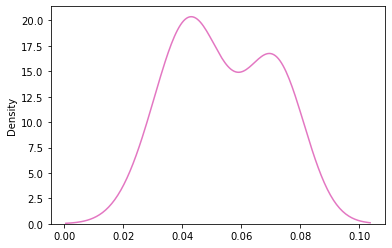

El valor del error promedio durante el testing es:  0.053718584038542704
La desviacion estandar del error es:  0.015187959391881813
La matriz de confusion es:


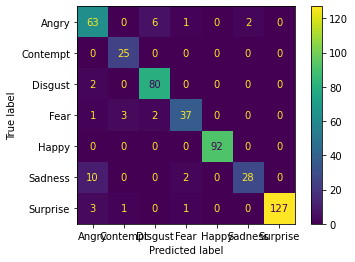

In [197]:
modelo_svm = LinearSVC(penalty="l2", dual=False, tol=1e-2, max_iter = 1000, loss='squared_hinge', C=1, random_state=5)
entrenarModelo(modelo_svm, n, repeticiones, data2)

#### Arboles de decision

---------------------------------------Arboles de decision---------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------


---------------------------------Resultados cuando se usa: gini------------------------------

-------------------------------------------------------------------------------------------------------


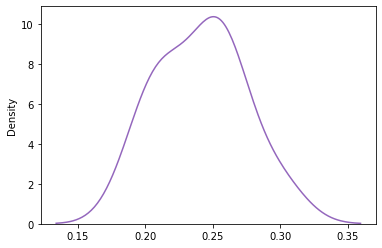

El valor del error promedio durante el testing es:  0.24121762305944214
La desviacion estandar del error es:  0.030353926297234265
La matriz de confusion es:
---------------------------------Resultados cuando se usa: entropy------------------------------

-------------------------------------------------------------------------------------------------------


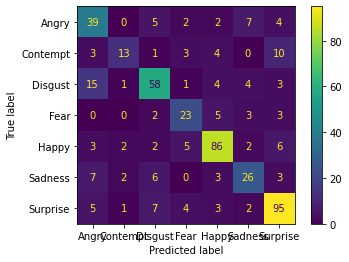

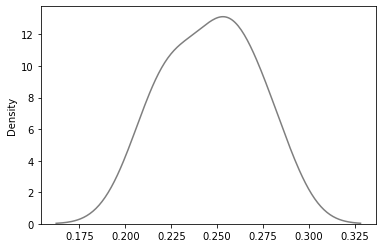

El valor del error promedio durante el testing es:  0.24609784795108447
La desviacion estandar del error es:  0.022850175028668276
La matriz de confusion es:


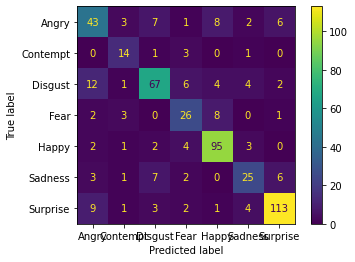

In [198]:
print("---------------------------------------Arboles de decision---------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("\n")
np.random.seed(5)
tree_criterion = ["gini", "entropy"]
for criterio in tree_criterion:
    print("---------------------------------Resultados cuando se usa: " + criterio + "------------------------------" "\n")
    print("-------------------------------------------------------------------------------------------------------")
    modelo_tree = DecisionTreeClassifier(criterion=criterio,max_depth=None, max_features=None, random_state=5)
    entrenarModelo(modelo_tree, n, repeticiones, data2)   

In [201]:
def entrenarModelo(modelo, n, repeticiones, data2, neighbor, distancia):
    error = []
    acc = []
    for i in range(repeticiones):
        X_train, Y_train, X_test, Y_test = bootstrap(n, data2)
        modelo.fit(X_train, Y_train)
        pred = modelo.predict(X_test)
        accuracy = accuracy_score(Y_test, pred)
        acc.append(accuracy)
        error.append(1-accuracy)
    ## Grafica del error
    fig = plt.figure()
    sns.distplot(error, hist=False, color=sns.color_palette()[randrange(10)])
    plt.show()
    print("El valor del error promedio durante el testing es: ", np.array(error).mean())
    print("La desviacion estandar del error es: ", np.array(error).std())
    pred = modelo.predict(X_test)
    print("La matriz de confusion es:") # \n", confusion_matrix(Y_test, pred))
    cm = confusion_matrix(Y_test, pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=sentimientos)
    disp.plot()

#### KNN

-----------------------------------------------KNN-----------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------


-----------------------------Resultados cuando se usa distancia Manhattan------------------------------
-------------------------------------------------------------------------------------------------------
Resultados cuando se usa k= 2



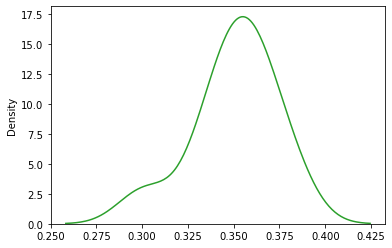

El valor del error promedio durante el testing es:  0.3504450050997852
La desviacion estandar del error es:  0.021444632822625393
La matriz de confusion es:
Resultados cuando se usa k= 3



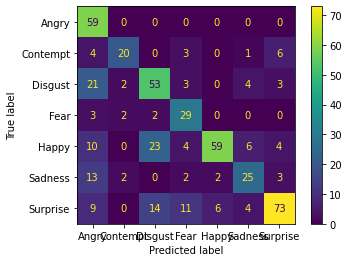

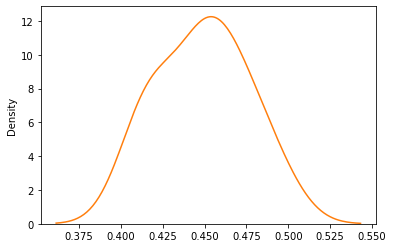

El valor del error promedio durante el testing es:  0.4488543529301644
La desviacion estandar del error es:  0.025224891144088532
La matriz de confusion es:


-------------------------Resultados cuando se usa distancia Euclideana---------------------------------
-------------------------------------------------------------------------------------------------------
Resultados cuando se usa k= 2



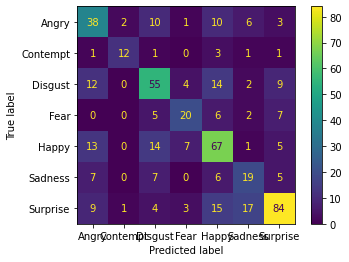

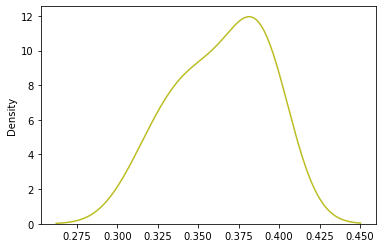

El valor del error promedio durante el testing es:  0.3639074897633421
La desviacion estandar del error es:  0.026436280207042844
La matriz de confusion es:
Resultados cuando se usa k= 3



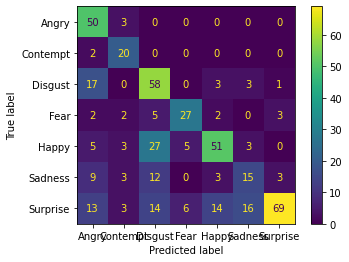

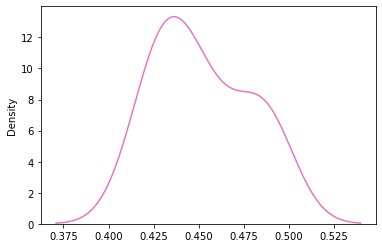

El valor del error promedio durante el testing es:  0.45201109181842314
La desviacion estandar del error es:  0.02461773887735341
La matriz de confusion es:


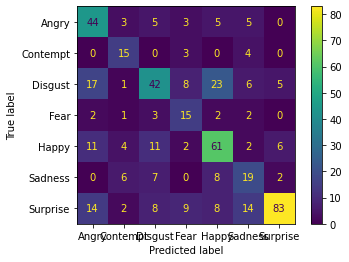

In [202]:
np.random.seed(5)
n_neighbors = [i for i in range(2,4)]
print("-----------------------------------------------KNN-----------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------")
print("\n")

print("-----------------------------Resultados cuando se usa distancia Manhattan------------------------------")
print("-------------------------------------------------------------------------------------------------------")
for neighbors in n_neighbors:
    print("Resultados cuando se usa k= " + str(neighbors) + "\n")
    modelo_knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm= 'kd_tree',p=1)
    entrenarModelo(modelo_knn, n, repeticiones, data2, neighbors, "Manhattan")
print("\n")    
print("-------------------------Resultados cuando se usa distancia Euclideana---------------------------------")
print("-------------------------------------------------------------------------------------------------------")
for neighbors in n_neighbors:
    print("Resultados cuando se usa k= " + str(neighbors) + "\n")
    modelo_knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm= 'kd_tree',p=2)
    entrenarModelo(modelo_knn, n, repeticiones, data2, neighbors, "Euclideana")    